In [5]:
import pandas as pd
import os
import glob
from Bio import PDB
def compare_sequences(pdb_file, wild_type_pdb_file):
    parser = PDB.PDBParser()

    # Parse the current structure
    structure = parser.get_structure("structure", pdb_file)

    # Parse the wild-type structure
    wild_type_structure = parser.get_structure("wild_type_structure", wild_type_pdb_file)

    # Get the chains from the structures
    chains = structure[0]
    wild_type_chains = wild_type_structure[0]

    # Initialize the mutation count
    mutation_count = 0

    # Compare the residues in each chain with the wild-type structure
    for chain, wild_type_chain in zip(chains, wild_type_chains):
        for residue, wild_type_residue in zip(chain, wild_type_chain):
            residue_id = residue.get_resname() + str(residue.get_id()[1])
            wild_type_residue_id = wild_type_residue.get_resname() + str(wild_type_residue.get_id()[1])
            if residue_id != wild_type_residue_id:
                mutation_count += 1

    return mutation_count


In [6]:
# Directory containing the PDB files
pdb_directory = "/home/nick/Documents/PDBs"

# Wild-type PDB file
wild_type_pdb_file = "../data/wt.pdb"

mutations = {}  # Dictionary to store folder name as key and mutation count as value

for folder_name in glob.glob(os.path.join(pdb_directory, "*")):
    folder_base_name = os.path.basename(folder_name)
    if os.path.isdir(folder_name):
        for pdb_file in glob.glob(os.path.join(folder_name, "*.pdb")):
            mutation_count = compare_sequences(pdb_file, wild_type_pdb_file)
            mutations[folder_base_name] = mutations.get(folder_base_name, 0) + mutation_count

# Create a DataFrame from the mutations dictionary
df = pd.DataFrame(list(mutations.items()), columns=['folder_name', 'mutation_count'])


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/ulocal/anaconda3/envs/Engineering_EKB/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1845
  warnings.warn(


In [7]:
df

,folder_name,mutation_count
0,105,4
1,1,5
2,10,2
3,101,6
4,103,5
...,...,...
307,95,6
308,96,7
309,98,2
310,97,7


/tmp/ipykernel_5451/2649456957.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mutation_count'], kde=False, bins=20)


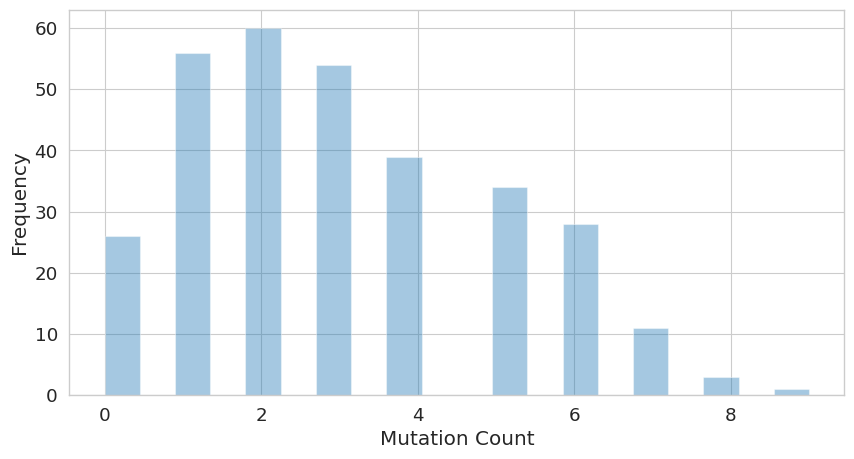

In [8]:
# plot distribution of the mutation counts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(10, 5))
sns.distplot(df['mutation_count'], kde=False, bins=20)
plt.xlabel("Mutation Count")
plt.ylabel("Frequency")
#plt.savefig("mutation_count_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
# print the percentage of mutations above or equal to 5
print("Percentage of mutations above or equal to 5: {:.2f}%".format(len(df[df['mutation_count'] >= 5]) / len(df) * 100))

Percentage of mutations above or equal to 5: 24.68%
